# Работа с данными. Домашнее задание


## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [8]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


In [10]:
# В названии столбца скорее всего опечатка
df.rename(columns={'Genre': 'Gender'}, inplace=True)

In [6]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40
...,...,...,...,...,...
195,196,Female,35.0,120.0,79
196,197,Female,45.0,126.0,28
197,198,Male,32.0,126.0,74
198,199,Male,NaN,137.0,18


In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,180.000000,180.000000,200.000000
mean,100.500000,39.894444,5615.433333,50.200000
std,57.879185,16.842848,74531.115872,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,29.000000,42.000000,34.750000
50%,100.500000,36.000000,61.000000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,135.000000,1000000.000000,99.000000


In [12]:
df.sample(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
100,101,Female,23.0,62.0,41
54,55,NaN,50.0,NaN,45
145,146,Male,NaN,77.0,97
34,35,Feemale,49.0,33.0,14
128,129,Male,59.0,NaN,11
116,117,Female,NaN,65.0,43
179,180,Male,35.0,93.0,90


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

Проверяем и удаляем дубликаты только в CustomerID (см обсуждение семинар timing 1:00:00)

In [13]:
duplicates = df[df.duplicated(subset='CustomerID')]
print("Дубликаты по CustomerID:")
print(duplicates)

Дубликаты по CustomerID:
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


В столбце CustomerID нет дубликатов, и DataFrame уже очищен от любых повторений по этому столбцу, поэтому в дальнейшем дубликаты не ищем и не удаляем, чтобы не исказить модель.

In [17]:
# Проверка количества пропусков в каждом признаке
missing_values = df.isnull().sum()
print("Количество пропусков в каждом признаке:")
print(missing_values)

Количество пропусков в каждом признаке:
Gender                    19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64


In [18]:
# Удаляем столбец 'CustomerID'
df = df.drop('CustomerID', axis=1)

# Проверка, что столбец удален
print(df.head())

KeyError: "['CustomerID'] not found in axis"

In [19]:
# Предварительная проверка уникальных значений в каждом столбце
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Уникальные значения в столбце {column}: {unique_values}')

Уникальные значения в столбце Gender: ['Male' 'Female' nan 'Feemale']
Уникальные значения в столбце Age: [ 19.  nan  23.  31.  22. 135.  30.  35.  58.  24.  37.  20.  52.  25.
  46.  54.  29.  45.  40.  60.  21.  53.  18.  49.  65.  48.  27.  33.
  59.  50.  47.  51.  69.  70.  67.  63.  43.  68.  32.  26.  57.  38.
  55.  66.  39.  44.  28.  34.  56.  36.  42.  41.]
Уникальные значения в столбце Annual Income (k$): [1.50e+01      nan 1.60e+01 1.70e+01 1.80e+01 1.90e+01 2.00e+01 2.10e+01
 2.30e+01 2.40e+01 2.50e+01 2.80e+01 2.90e+01 3.00e+01 3.30e+01 3.40e+01
 3.70e+01 3.80e+01 3.90e+01 4.00e+01 4.20e+01 4.30e+01 4.40e+01 4.60e+01
 4.70e+01 4.80e+01 4.90e+01 5.00e+01 5.40e+01 5.70e+01 5.80e+01 5.90e+01
 6.00e+01 6.10e+01 6.20e+01 6.30e+01 6.40e+01 6.50e+01 6.70e+01 6.90e+01
 7.00e+01 7.10e+01 7.20e+01 7.30e+01 7.40e+01 7.50e+01 7.60e+01 7.70e+01
 7.80e+01 1.00e+06 7.90e+01 8.10e+01 8.50e+01 8.60e+01 8.70e+01 8.80e+01
 9.30e+01 9.70e+01 9.80e+01 9.90e+01 1.03e+02 1.13e+02 1.20e+02 1.26e

In [20]:
# Сразу преобразуем все аномальные значения
df['Gender'] = df['Gender'].replace({'Feemale': 'Female'})  # Исправление опечатки
df['Gender'] = df['Gender'].fillna('Unknown')  # Замена пропусков на 'Unknown'

In [21]:
# Установить формат отображения чисел
pd.options.display.float_format = '{:,.3f}'.format
df['Annual Income (k$)'] = df['Annual Income (k$)'].astype(float)
print(df['Annual Income (k$)'].head())

0   15.000
1      NaN
2   16.000
3   16.000
4   17.000
Name: Annual Income (k$), dtype: float64


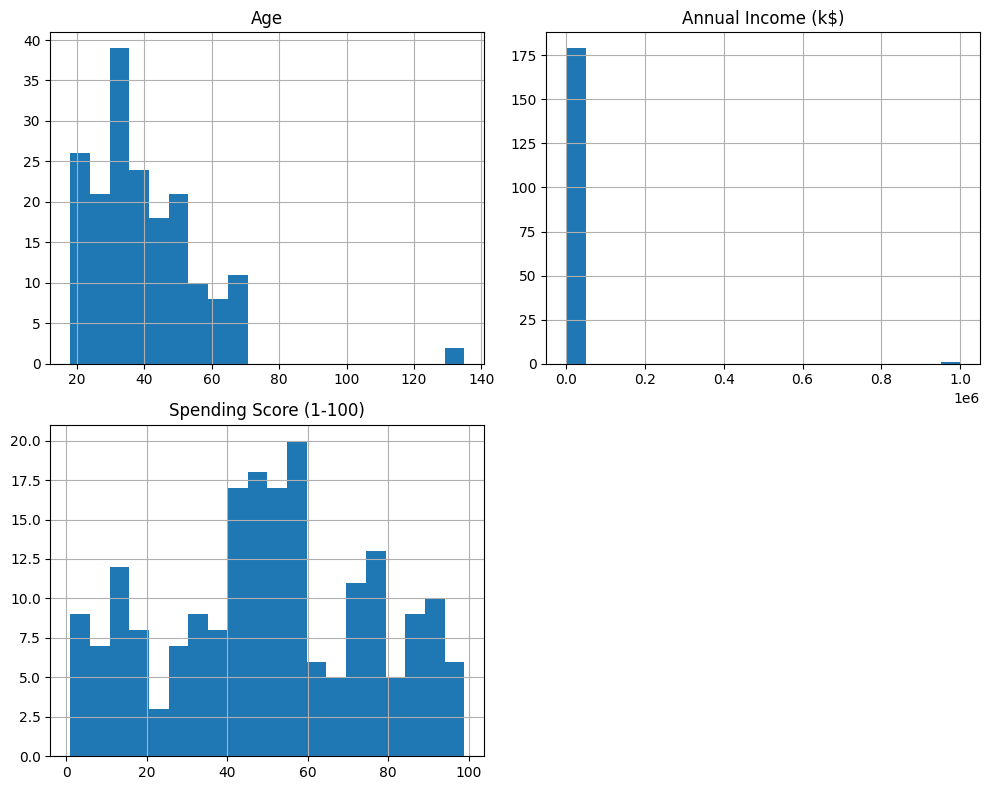

In [22]:
# Гистограммы для числовых признаков
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [25]:
from sklearn.model_selection import train_test_split
# Разделение на признаки (X) и целевую переменную (y)
X = df.drop(columns=['Spending Score (1-100)']) # Cоздаем новую переменную X, которая содержит все столбцы из датафрейма df, кроме столбца 'Spending Score (1-100)'
y = df['Spending Score (1-100)']

# Разделение данных на обучающую и тестовую выборки (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Проверка форматов данных
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
X

Размер обучающей выборки: (160, 3)
Размер тестовой выборки: (40, 3)


,Gender,Age,Annual Income (k$)
0,Male,19.000,15.000
1,Male,NaN,NaN
2,Female,NaN,16.000
3,Female,23.000,16.000
4,Female,31.000,17.000
...,...,...,...
195,Female,35.000,120.000
196,Female,45.000,126.000
197,Male,32.000,126.000
198,Male,NaN,137.000


### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [26]:
from sklearn.impute import SimpleImputer
# Для числовых признаков (возраст, годовой доход)
numeric_imputer = SimpleImputer(strategy='median')
X_train[['Age', 'Annual Income (k$)']] = numeric_imputer.fit_transform(X_train[['Age', 'Annual Income (k$)']])
# Для категориальных признаков (пол)
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train['Gender'] = categorical_imputer.fit_transform(X_train['Gender'].values.reshape(-1, 1)).ravel()
# Проверка, что пропусков больше нет
print(X_train.isnull().sum())

Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64


  Age и Annual Income (k$): Медиана является устойчивой к выбросам и лучше отражает центральное положение данных, особенно если в признаке наблюдаются аномальные значения.

  Genre: Для категориального признака разумно использовать моду, так как это минимизирует влияние отсутствующих данных и сохраняет распределение категорий.


In [27]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19.000,15.000,39
1,Male,NaN,NaN,81
2,Female,NaN,16.000,6
3,Female,23.000,16.000,77
4,Female,31.000,17.000,40
...,...,...,...,...
195,Female,35.000,120.000,79
196,Female,45.000,126.000,28
197,Male,32.000,126.000,74
198,Male,NaN,137.000,18


### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


На графике описания данных видно, что существует аномальный выброс: возраст больше 120 лет.  Возможно произвести замену на моду или медиану или на среднее значение.
 Выбор метода обнаружения выбросов: Мы используем метод IQR, который основан на межквартильном диапазоне. Выбросы определяются как значения, выходящие за пределы 1.5 * IQR ниже первого квартиля (Q1) и выше третьего квартиля (Q3).

Обработка выбросов:  выбросы можно заменить на границы (либо Q1 - 1.5 * IQR, либо Q3 + 1.5 * IQR).

In [28]:
# Определяем аномальные значения в возрасте
anomalous_ages = X_train[X_train['Age'] > 120]
print("Аномальные значения возраста:")
print(anomalous_ages)

Аномальные значения возраста:
    Gender     Age  Annual Income (k$)
6  Unknown 135.000              18.000
8     Male 135.000              19.000


In [29]:
# Находим моду для возраста
mode_age = X_train['Age'].mode()[0]

# Заменяем аномальные значения на моду
X_train.loc[X_train['Age'] > 90, 'Age'] = mode_age

# Проверяем, что аномальные значения были заменены
print(X_train[X_train['Age'] > 90])

Empty DataFrame
Columns: [Gender, Age, Annual Income (k$)]
Index: []


При обработке аномальных значений для признака, такого как годовой доход, важно учитывать контекст и понимание данных: сложно принять решение (по удалению или замене) т.к. про возраст точно кто-то пошутил или ошибся, а доход может быть аномально высоким.

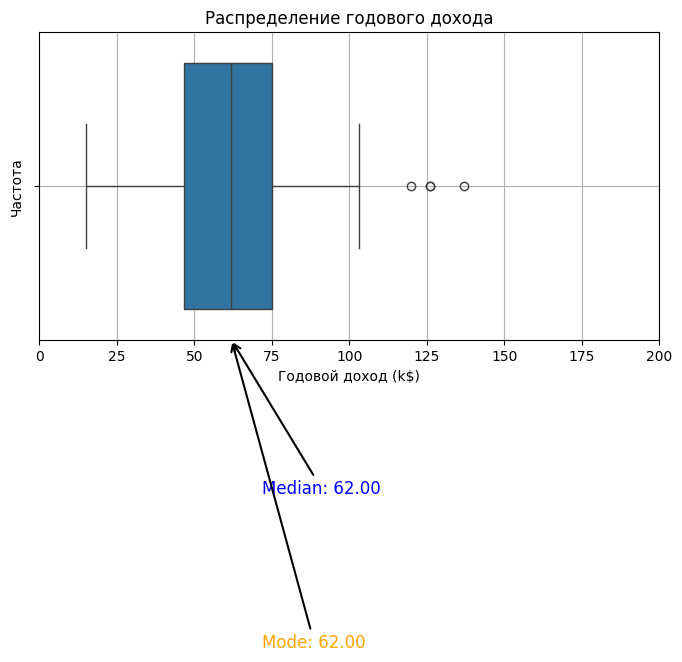

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 4))

# Создание boxplot
ax = sns.boxplot(x=X_train['Annual Income (k$)'])

# Вычисление медианы и моды
median_income = X_train['Annual Income (k$)'].median()
mode_income = X_train['Annual Income (k$)'].mode()[0]  # Используем первый элемент, если несколько мод

# Установка границ оси X
plt.xlim(left=0, right=200)  # Настройте границы по вашему усмотрению

# Аннотация для медианы
ax.annotate(f'Median: {median_income:.2f}', xy=(median_income, 0.5),
            xytext=(median_income + 10, 1),
            arrowprops=dict(arrowstyle='->', lw=1.5),
            fontsize=12, color='blue')

# Аннотация для моды
ax.annotate(f'Mode: {mode_income:.2f}', xy=(mode_income, 0.5),
            xytext=(mode_income + 10, 1.5),
            arrowprops=dict(arrowstyle='->', lw=1.5),
            fontsize=12, color='orange')

# Заголовок и подписи
plt.title('Распределение годового дохода')
plt.xlabel('Годовой доход (k$)')
plt.ylabel('Частота')
plt.grid(True)

plt.show()

Поступить с аномальными выбросами в данных дохода так же как с аномальными выбросами данных возраста нецелесообразно, потому что они могут быть обусловлены несколькими возможными факторами: действительно высоким доходом по сравнению с невозможностью возраста в 135 лет, наличием в качестве покупателя юридического лица или оптового клиента. таких аномально высоких выбросов 3 и было бы интересно проверить связано ли аномально высокие выбросы эээ с такими строками где пропущен пол клиента или возраст, чтобы аргументировать догадку о возможности происхождения таких аномально высоких данных годового дохода. На основании анализа на предобработаных данных будет приниматься решение, как поступить с выбросами в данных о годовом доходе:
 Замена аномальных значений на максимальное значение или вынесение их в отдельную категорию может быть обоснованными подходами в зависимости от контекста данных и бизнес-логики.

1. Замена аномалий на максимальное значение
Плюсы:
Поддерживает структуру данных, поскольку записи не удаляются, а причисляются к максимальным в выборке.
В некоторых случаях может быть логичным, чтобы аномальные значения не значительно отклонялись от реальных значений.
Минусы:
Если заменить аномальные значения на максимальное значение, это может создать ложное представление о данных, особенно если есть много клиентов с реальными высокими доходами.
Может искажать средние значения и другие статистические метрики, что может негативно сказаться на качестве модели.
2. Вынесение аномалий в отдельную категорию (если положительная корреляция с незаполненной графой пол или возраст 135 лет статистически значима)
Плюсы:
Позволяет сохранить информацию о клиентах с аномальными значениями, что может быть полезно для бизнес-анализа.
Создание новой категории (например, "юр. лицо" или "оптовик") может помочь модели лучше понимать данные, поскольку это добавляет дополнительную информацию о характере клиента.
Минусы:
Возможно, потребуется больше работы для правильной настройки модели и анализа, чтобы убедиться, что эта новая категория правильно воспринимается моделью.
Необходимо также учитывать, как эта категория будет использоваться в ваших аналитических отчетах.
3. Оставить данные в первозданном виде
Плюсы:
Простота обработки и минимальные изменения в данных.
Если есть предположения о том, что аномальные значения могут быть верными, это решение может быть оптимальным.
Минусы:
Может негативно сказаться на производительности модели, если выбросы не будут обработаны.

In [32]:
# Загрузка исходных данных
df_original = pd.read_csv('Mall_Customers.csv')

df_original.sample(7)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
82,83,Male,67.000,54.000,41
74,75,Male,59.000,54.000,47
20,21,Male,35.000,24.000,35
134,135,Male,20.000,73.000,5
92,93,Male,48.000,60.000,49
93,94,Female,40.000,60.000,40
122,123,Female,40.000,69.000,58


In [33]:
# В названии столбца скорее всего опечатка
df_original.rename(columns={'Genre': 'Gender'}, inplace=True)

In [34]:
# Установка порогового значения для аномально высокого дохода
high_income_threshold = 100  # например, 100k$, можно изменить по необходимости

# Фильтрация данных по условию
high_income_data = df_original[df_original['Annual Income (k$)'] > high_income_threshold]

# Проверка на наличие отсутствующих значений в Gender среди клиентов с аномально высоким доходом
missing_gender_high_income = high_income_data['Gender'].isnull().sum()

# Проверка общего количества клиентов с аномально высоким доходом
total_high_income_count = high_income_data.shape[0]

# Расчет процента клиентов с отсутствующими значениями в Gender
percentage_missing_gender = (missing_gender_high_income / total_high_income_count) * 100 if total_high_income_count > 0 else 0

print(f"Количество клиентов с аномально высоким доходом: {total_high_income_count}")
print(f"Количество отсутствующих значений в Gender: {missing_gender_high_income}")
print(f"Процент отсутствующих значений в Gender среди клиентов с высоким доходом: {percentage_missing_gender:.2f}%")

Количество клиентов с аномально высоким доходом: 12
Количество отсутствующих значений в Gender: 2
Процент отсутствующих значений в Gender среди клиентов с высоким доходом: 16.67%


In [35]:
# Установка порогового значения для аномально высокого дохода
high_income_threshold = 100  # Например, 100k$

# Фильтрация данных по условию
high_income_over_90 = df_original[(df_original['Annual Income (k$)'] > high_income_threshold) & (df_original['Age'] > 90)]

# Проверка количества клиентов
count_high_income_over_90 = high_income_over_90.shape[0]

print(f"Количество клиентов с аномально высоким доходом и возрастом старше 90 лет: {count_high_income_over_90}")
print(high_income_over_90[['Gender', 'Age', 'Annual Income (k$)']])  # Выводим информацию о таких клиентах

Количество клиентов с аномально высоким доходом и возрастом старше 90 лет: 0
Empty DataFrame
Columns: [Gender, Age, Annual Income (k$)]
Index: []


Варианты действий с аномально высокими выбросами доходов:
1. Оставить без изменений
Обоснование: Оставление выбросов в данных может предоставить более полное представление о клиентской базе, включая возможность наличия очень состоятельных клиентов или организаций. Это может быть важно для анализа рынка.
Плюсы:
Сохранение всей информации, включая данные о клиентах с высоким доходом.
Возможность выявить новые паттерны или тренды в будущем анализе.
Минусы:
Результаты анализа могут быть искажены. Например, если используется алгоритм машинного обучения, он может быть чувствителен к выбросам и давать некорректные прогнозы.
Статистические метрики (например, среднее значение) могут быть значительно смещены.
2. Заменить выбросы
На максимальное значение: Если выбросы будут заменены на максимальное значение в наборе данных, это может быть оправдано, если мы предполагаем, что они представляют собой нечто большее, чем просто аномалии.
Плюсы:
Это сохранит общую структуру данных и позволит избежать потерь информации.
Устойчивость к дальнейшим искажениям данных.
Минусы:
Может создать иллюзию, что остальные данные также могут быть равны этому значению.
Если максимальное значение не является реальным, это может вызвать дополнительные проблемы в анализе.
На медиану или моду: Замена выбросов на медиану или моду более консервативна и предпочтительна для поддержания статистической целостности данных.
Плюсы:
Медиана менее чувствительна к выбросам, поэтому распределение данных останется более сбалансированным.
Сохранение более реалистичных значений для дальнейшего анализа.
Минусы:
Могут быть потеряны важные детали о клиентской базе, если выбросы действительно представляют собой важные данные.
3. Удалить выбросы
Обоснование: Удаление выбросов может помочь сделать набор данных более «чистым» и лучше подходящим для анализа.
Плюсы:
Устранение искажений, которые могут повлиять на результаты анализа.
Улучшение стабильности алгоритмов машинного обучения, которые могут не справляться с выбросами.
Минусы:
Информация о потенциально важной категории клиентов может быть потеряна.
Если выбросы будут представлять собой реальных клиентов, это может уменьшить возможности для анализа в дальнейшем.
4. Классификация как отдельная категория
Обоснование: Выделение аномальных значений в отдельную категорию, например, юридические лица или оптовые покупатели, может помочь сохранить информацию.
Плюсы:
Позволит проанализировать отдельные сегменты клиентов, что может выявить новые инсайты.
Сохранение всех данных при их классификации.
Минусы:
Необходимо будет обновить методы анализа для учета новой категории.
Может вызвать дополнительные сложности в интерпретации результатов.
Рекомендация
Перед принятием решения рекомендуется провести дополнительный анализ, чтобы выяснить, являются ли аномальные значения случайными выбросами или же это важные данные о клиентах. Например, если клиенты с высокими доходами не имеют информации о поле, может быть полезно проверить их возраст, чтобы понять, связаны ли эти два факта.

Если эти клиенты действительно представляют интересный сегмент рынка (например, юридические лица), стоит рассмотреть возможность их выделения в отдельную категорию. В противном случае, если они являются простыми аномалиями, замена или удаление выбросов могут быть более предпочтительными.

### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


Можно использовать метод IQR (межквартильный размах) для определения выбросов. Этот метод позволяет установить границы, за которыми значения считаются выбросами.

count   160.000
mean     38.126
std      12.411
min      19.000
25%      30.000
50%      37.000
75%      47.000
max      63.150
Name: Age, dtype: float64


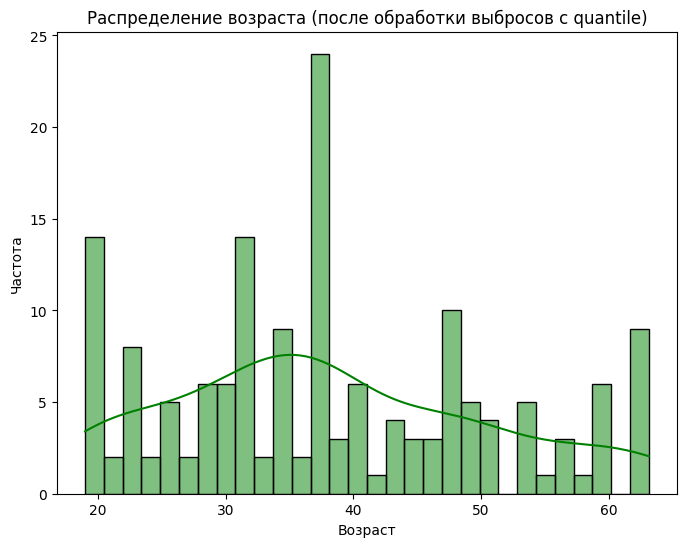

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что X_train уже загружен и содержит столбец 'Age'

# Проверка на наличие пропусков
if X_train['Age'].isnull().sum() > 0:
    print("В данных есть пропуски в столбце 'Age'. Рекомендуется заполнить их перед обработкой выбросов.")

# Определение нижней и верхней границ выбросов с помощью квантилей
lower_bound_age = X_train['Age'].quantile(0.05)  # 5-й процентиль
upper_bound_age = X_train['Age'].quantile(0.95)  # 95-й процентиль

# Замена значений ниже 5-го и выше 95-го процентилей на соответствующие квантильные значения
X_train.loc[X_train['Age'] < lower_bound_age, 'Age'] = lower_bound_age
X_train.loc[X_train['Age'] > upper_bound_age, 'Age'] = upper_bound_age

# Проверка результата
print(X_train['Age'].describe())

# Визуализация распределения возраста после обработки
plt.figure(figsize=(8, 6))
sns.histplot(X_train['Age'], bins=30, kde=True, color='green')
plt.title('Распределение возраста (после обработки выбросов с quantile)')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

1. Метод Winsorizing заменяет аномальные значения на определенный процентиль, что позволяет сохранить информацию о них, но уменьшает их влияние.

Подход:
Заменить значения выше 95-го или 99-го процентиля на значения в этом процентиле.
Это позволит сохранить информацию о клиентах с высокими доходами, не влияя на модель.
2. Использование логарифмической трансформации
Логарифмическая трансформация может помочь уменьшить влияние выбросов, так как она сжимает диапазон значений.

Подход:
Примените логарифмическую трансформацию к годовым доходам.
Это сделает распределение более симметричным и снизит влияние высоких значений.

In [38]:
# Определение 95-го процентиля для годового дохода
income_upper_limit = X_train['Annual Income (k$)'].quantile(0.95)

# Замена значений выше 95-го процентиля на это значение
X_train.loc[X_train['Annual Income (k$)'] > income_upper_limit, 'Annual Income (k$)'] = income_upper_limit

# Проверка результата
print(X_train['Annual Income (k$)'].describe())

count   160.000
mean     59.806
std      22.526
min      15.000
25%      46.750
50%      62.000
75%      75.000
max     103.000
Name: Annual Income (k$), dtype: float64


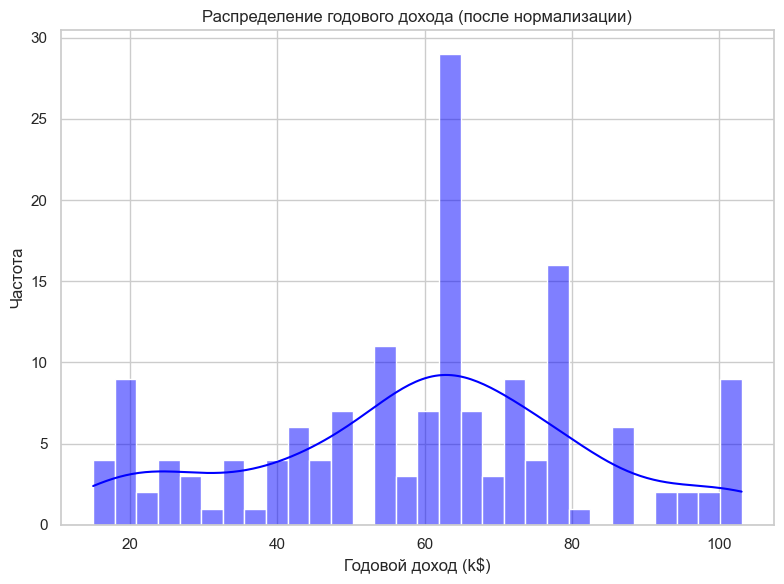

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Определение 95-го процентиля для годового дохода
income_upper_limit = X_train['Annual Income (k$)'].quantile(0.95)

# Замена значений выше 95-го процентиля на это значение
X_train.loc[X_train['Annual Income (k$)'] > income_upper_limit, 'Annual Income (k$)'] = income_upper_limit

# Настройка стиля
sns.set(style='whitegrid')

plt.figure(figsize=(8, 6))

# График распределения годового дохода после нормализации
sns.histplot(X_train['Annual Income (k$)'], bins=30, kde=True, color='blue')
plt.title('Распределение годового дохода (после нормализации)')
plt.xlabel('Годовой доход (k$)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Основные Scaler-методы:
StandardScaler: Приводит данные к распределению с нулевым средним и стандартным отклонением 1 (полезно для данных с нормальным распределением).
MinMaxScaler: Преобразует данные в диапазон [0, 1] (полезно для данных, где есть фиксированные минимальные и максимальные границы).
Как выбрать Scaler:
Если у данных нет строгого нормального распределения, MinMaxScaler может быть предпочтительным, так как он не предполагает определенного распределения.
Если данные приблизительно нормальны, StandardScaler лучше нормализует их с точки зрения среднего и дисперсии.

          Age  Annual Income (k$)
count 160.000             160.000
mean    0.000               0.000
std     1.003               1.003
min    -1.546              -1.995
25%    -0.657              -0.581
50%    -0.091               0.098
75%     0.717               0.677
max     2.023               1.923


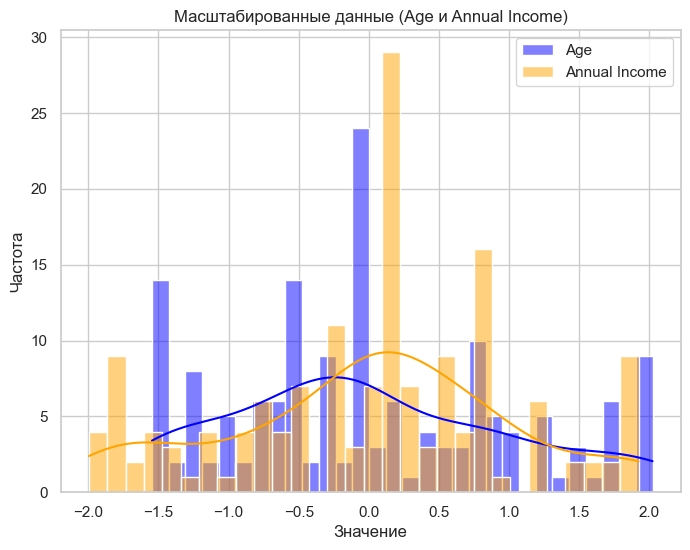

In [41]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем экземпляр StandardScaler
scaler = StandardScaler()

# Применяем масштабирование только к числовым признакам (например, 'Age' и 'Annual Income (k$)')
X_train[['Age', 'Annual Income (k$)']] = scaler.fit_transform(X_train[['Age', 'Annual Income (k$)']])

# Проверяем результаты
print(X_train[['Age', 'Annual Income (k$)']].describe())

# Визуализация масштабированных данных
plt.figure(figsize=(8, 6))
sns.histplot(X_train['Age'], bins=30, kde=True, color='blue', label='Age')
sns.histplot(X_train['Annual Income (k$)'], bins=30, kde=True, color='orange', label='Annual Income')
plt.title('Масштабированные данные (Age и Annual Income)')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.show()

### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [42]:
print(X_train.columns)

Index(['Gender', 'Age', 'Annual Income (k$)'], dtype='object')


In [43]:
# Проверка уникальных значений в Gender
print(df['Gender'].unique())

# Проверка значений в Age и Annual Income
print(df[['Age', 'Annual Income (k$)']].describe())



['Male' 'Female' 'Unknown']
          Age  Annual Income (k$)
count 180.000             180.000
mean   39.894           5,615.433
std    16.843          74,531.116
min    18.000              15.000
25%    29.000              42.000
50%    36.000              61.000
75%    49.000              78.000
max   135.000       1,000,000.000


In [44]:
# Замена опечатки и пропусков
df['Gender'] = df['Gender'].replace({'Feemale': 'Female', np.nan: 'Female'})
# Проверка уникальных значений после замены
print(df['Gender'].unique())

['Male' 'Female' 'Unknown']


In [45]:
from sklearn.impute import SimpleImputer
import numpy as np

# Заменяем значения "Unknown" на NaN с использованием mask
X_train['Gender'] = X_train['Gender'].mask(X_train['Gender'] == 'Unknown', np.nan)

# Создание экземпляра SimpleImputer для заполнения NaN в категориальных данных
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Заполнение пропусков в колонке 'Gender'
X_train['Gender'] = categorical_imputer.fit_transform(X_train[['Gender']]).flatten()

# Преобразование значений 'Gender' в бинарные
X_train['Gender'] = X_train['Gender'].replace({'Male': 1, 'Female': 0})

# Проверка результата
print(X_train[['Gender', 'Age', 'Annual Income (k$)']].head())
print(X_train.isnull().sum())  # Проверка на наличие NaN

     Gender    Age  Annual Income (k$)
108       1  2.023               0.142
107       1  1.283               0.142
189       0 -0.172               1.923
14        1 -0.091              -1.773
56        0  1.041              -0.704
Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64


/var/folders/4b/7k6l7jgn2zx1vq46wr0m6fbw0000gn/T/ipykernel_45621/3408194587.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['Gender'] = X_train['Gender'].replace({'Male': 1, 'Female': 0})


In [46]:
# Откуда-то берутся NaN (уже после обработки и замены значений)
# Проверка количества пропусков в каждом признаке
# Проверка количества пропусков в каждом признаке
missing_values = X_train.isnull().sum()
print("Количество пропусков в каждом признаке:")
print(missing_values)

Количество пропусков в каждом признаке:
Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64


In [47]:
# Проверка результата
print(X_train[['Gender', 'Age', 'Annual Income (k$)']].head())
print(X_train.isnull().sum())  # Проверка на наличие NaN

     Gender    Age  Annual Income (k$)
108       1  2.023               0.142
107       1  1.283               0.142
189       0 -0.172               1.923
14        1 -0.091              -1.773
56        0  1.041              -0.704
Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64


In [48]:
for column in X_train.columns:
    unique_values = X_train[column].unique()
    print(f'Уникальные значения в столбце {column}: {unique_values}')

Уникальные значения в столбце Gender: [1 0]
Уникальные значения в столбце Age: [ 2.0226112   1.28303809 -0.17185982 -0.09103215  1.04055511 -0.25268748
 -1.54593006 -1.4651024  -0.65682579 -1.22261942  0.79807212  0.07062317
  0.95972745  1.6871764  -0.49517046 -1.30344708  0.15145083 -1.38427474
 -0.73765345  0.39393382 -0.33351514  0.31310615  1.60634874  0.87889979
 -0.89930877  0.71724446 -0.01020449 -1.14179176 -1.06096409 -0.81848111
 -0.98013643  0.47476148 -0.4143428   1.44469342  1.20221043  0.6364168
 -0.57599812  0.23227849  2.01048705  1.52552108  0.55558914  1.76800406
  1.36386576]
Уникальные значения в столбце Annual Income (k$): [ 0.14222302  1.92348985 -1.77263882 -0.70387872 -1.63904381  0.23128636
  0.09769135  1.74536317  0.45394472  0.05315968  0.32034971 -0.74841039
 -1.1937271   1.47817315  1.65629983 -0.52575204 -0.25856201 -0.92653707
 -1.72810715 -1.90623383  0.49847639  1.7008315   0.81019808  1.16645145
  0.18675469  0.00862801 -0.03590366  0.40941305  0.543

In [50]:
X_train.sample(7)

,Gender,Age,Annual Income (k$)
161,0,-0.738,0.855
56,0,1.041,-0.704
167,0,-0.414,1.166
55,1,0.717,-0.748
189,0,-0.172,1.923
68,1,-0.091,-0.526
86,0,1.364,-0.125


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [51]:
from sklearn.impute import SimpleImputer
# Для числовых признаков (возраст, годовой доход)
numeric_imputer = SimpleImputer(strategy='median')
X_test[['Age', 'Annual Income (k$)']] = numeric_imputer.fit_transform(X_test[['Age', 'Annual Income (k$)']])
# Для категориальных признаков (возраст)
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_test['Gender'] = categorical_imputer.fit_transform(X_test['Gender'].values.reshape(-1, 1)).ravel()
# Проверка, что пропусков больше нет
print(X_test.isnull().sum())


Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64


In [52]:
# Определяем аномальные значения в возрасте
anomalous_ages = X_test[X_test['Age'] > 120]
print("Аномальные значения возраста:")
print(anomalous_ages)

Аномальные значения возраста:
Empty DataFrame
Columns: [Gender, Age, Annual Income (k$)]
Index: []


In [53]:
# Находим моду для возраста
mode_age = X_test['Age'].mode()[0]

# Заменяем аномальные значения на моду
X_test.loc[X_test['Age'] > 90, 'Age'] = mode_age

# Проверяем, что аномальные значения были заменены
print(X_test[X_test['Age'] > 90])

Empty DataFrame
Columns: [Gender, Age, Annual Income (k$)]
Index: []


count   40.000
mean    39.698
std     11.937
min     23.950
25%     31.750
50%     36.000
75%     49.000
max     65.000
Name: Age, dtype: float64


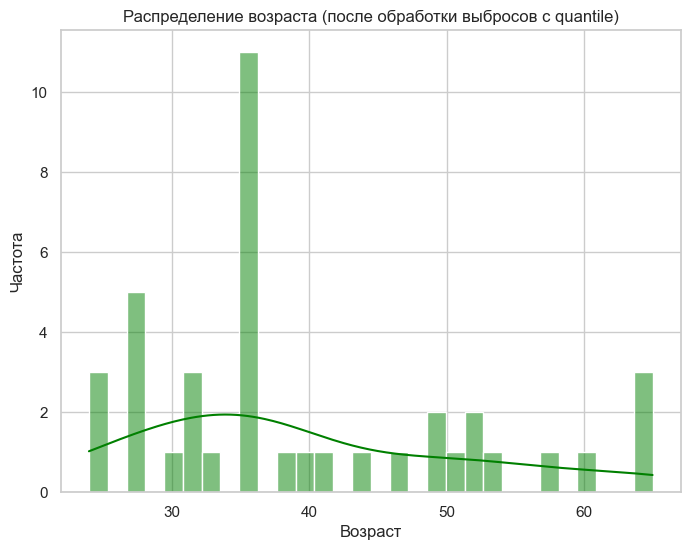

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что X_test уже загружен и содержит столбец 'Age'

# Проверка на наличие пропусков
if X_test['Age'].isnull().sum() > 0:
    print("В данных есть пропуски в столбце 'Age'. Рекомендуется заполнить их перед обработкой выбросов.")

# Определение нижней и верхней границ выбросов с помощью квантилей
lower_bound_age = X_test['Age'].quantile(0.05)  # 5-й процентиль
upper_bound_age = X_test['Age'].quantile(0.95)  # 95-й процентиль

# Замена значений ниже 5-го и выше 95-го процентилей на соответствующие квантильные значения
X_test.loc[X_test['Age'] < lower_bound_age, 'Age'] = lower_bound_age
X_test.loc[X_test['Age'] > upper_bound_age, 'Age'] = upper_bound_age

# Проверка результата
print(X_test['Age'].describe())

# Визуализация распределения возраста после обработки
plt.figure(figsize=(8, 6))
sns.histplot(X_test['Age'], bins=30, kde=True, color='green')
plt.title('Распределение возраста (после обработки выбросов с quantile)')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

In [55]:
# Определение 95-го процентиля для годового дохода
income_upper_limit = X_test['Annual Income (k$)'].quantile(0.95)

# Замена значений выше 95-го процентиля на это значение
X_test.loc[X_test['Annual Income (k$)'] > income_upper_limit, 'Annual Income (k$)'] = income_upper_limit

# Проверка результата
print(X_test['Annual Income (k$)'].describe())

count    40.000
mean     60.517
std      27.170
min      17.000
25%      38.750
50%      60.000
75%      85.500
max     113.350
Name: Annual Income (k$), dtype: float64


         Age  Annual Income (k$)
count 40.000              40.000
mean  -0.000               0.000
std    1.013               1.013
min   -1.336              -1.622
25%   -0.674              -0.811
50%   -0.314              -0.019
75%    0.789               0.931
max    2.147               1.969


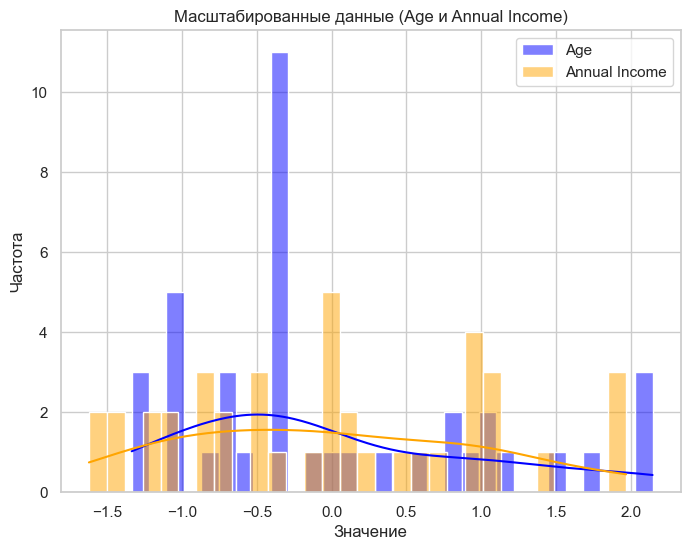

In [57]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем экземпляр StandardScaler
scaler = StandardScaler()

# Применяем масштабирование только к числовым признакам (например, 'Age' и 'Annual Income (k$)')
X_test[['Age', 'Annual Income (k$)']] = scaler.fit_transform(X_test[['Age', 'Annual Income (k$)']])

# Проверяем результаты
print(X_test[['Age', 'Annual Income (k$)']].describe())

# Визуализация масштабированных данных
plt.figure(figsize=(8, 6))
sns.histplot(X_test['Age'], bins=30, kde=True, color='blue', label='Age')
sns.histplot(X_test['Annual Income (k$)'], bins=30, kde=True, color='orange', label='Annual Income')
plt.title('Масштабированные данные (Age и Annual Income)')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.show()

In [59]:
print(X_test.columns)

Index(['Gender', 'Age', 'Annual Income (k$)'], dtype='object')


In [63]:
from sklearn.impute import SimpleImputer
import numpy as np

# Заменяем значения "Unknown" на NaN с использованием mask
X_test['Gender'] = X_test['Gender'].mask(X_test['Gender'] == 'Unknown', np.nan)

# Создание экземпляра SimpleImputer для заполнения NaN в категориальных данных
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Заполнение пропусков в колонке 'Gender'
X_test['Gender'] = categorical_imputer.fit_transform(X_test[['Gender']]).flatten()

# Преобразование значений 'Gender' в бинарные
X_test['Gender'] = X_test['Gender'].replace({'Male': 1, 'Female': 0})

# Проверка результата
print(X_test[['Gender', 'Age', 'Annual Income (k$)']].head())
print(X_test.isnull().sum())  # Проверка на наличие NaN

     Gender    Age  Annual Income (k$)
58        0 -1.077              -0.541
40        0  2.147              -0.839
34        0  0.789              -1.026
102       1  2.147               0.055
184       0  0.111               1.434
Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64


/var/folders/4b/7k6l7jgn2zx1vq46wr0m6fbw0000gn/T/ipykernel_45621/2887706968.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['Gender'] = X_test['Gender'].replace({'Male': 1, 'Female': 0})


In [64]:
X_test.sample(7)

,Gender,Age,Annual Income (k$)
165,0,-0.314,0.913
198,1,-0.314,1.969
29,0,-1.336,-1.175
35,0,-0.314,-1.026
174,0,1.044,1.024
51,0,-0.568,-0.690
95,0,-1.332,-0.019
